In [34]:
from importlib import reload
import src.UNET
import src.preprocessing
reload(src.UNET)
reload(src.preprocessing)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


In [22]:
# Load images
PATCH_SIZE = 256

x_train, x_test, y_train, y_test = data_generator(PATCH_SIZE, num_images = 15, rotation_degs=[])


In [35]:
# Build model equal to the tested model

unet = UNET(args = '', image_shape = (PATCH_SIZE, PATCH_SIZE, 3), layers = 4)
unet.build_model()
model = unet.get_model()


Building model with 4 layers
Filtersizes being used in UNET: [8, 16, 32, 64, 128]
Bulding contraction layers at layer: 1 and filtersize: 8
Bulding contraction layers at layer: 2 and filtersize: 16
Bulding contraction layers at layer: 3 and filtersize: 32
Bulding contraction layers at layer: 4 and filtersize: 64
Building bottleneck at layer: 4 and filtersize: 128
Building expansion at layer: 4 and filtersize: 64
Building expansion at layer: 3 and filtersize: 32
Building expansion at layer: 2 and filtersize: 16
Building expansion at layer: 1 and filtersize: 8
Compiling model...
Model compiled.


In [26]:
unet.describe_model()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 256, 256, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 256, 256, 16) 2320        conv2d_37[0][0]                  
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 256, 256, 16) 0           conv2d_38[0][0]                  
____________________________________________________________________________________________

In [36]:
model.load_weights('./models/keras-job-dir_weights_lay4_epoch40_12_12.40.h5')

In [37]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 2s 830ms/step


[1.7165428400039673,
 0.7657473087310791,
 0.8129072189331055,
 0.7237592935562134,
 0.7040202021598816]

In [61]:
# Run predictions
n = 10
pred = model.predict(x_train[n:n+1, :, :, :])
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0

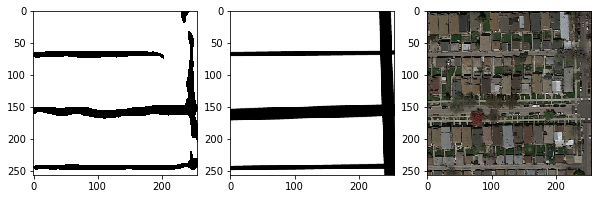

In [62]:

f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(pred.reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [19]:
from skimage.transform import resize

NEW_SIZE = 608
p = np.asarray([resize(pred[i], (608, 608, 1)) for i in range(len(pred))])
p[0].shape

(608, 608, 1)

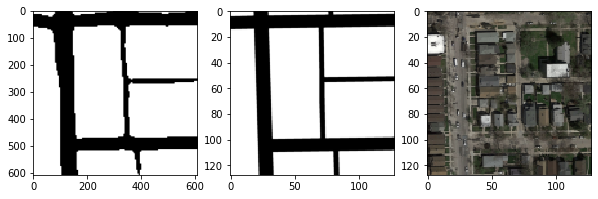

In [20]:
f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(p.reshape(NEW_SIZE, NEW_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [9]:
from src.create_submission import create_submission

create_submission('dummy_submission.csv', model)


Succesfully created submission.


In [10]:
import src.submission_to_mask 